# Experiment #3: Data Visualization Usability (T-Tests)

### Import the necessary datasets (i.e., survey responses)

In [58]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt

### Read in and process the survey responses

In [47]:
# Read in the survey responses
df = pd.read_csv('./SurveyResponses.csv')
df.head(5)

# Storing each set of responses for Tableau usability questions in a series
q1tab = df.loc[:, 'Q1Tab']
q2tab = df.loc[:, 'Q2Tab']
q3tab = df.loc[:, 'Q3Tab']
q4tab = df.loc[:, 'Q4Tab']
q5tab = df.loc[:, 'Q5Tab']
qalltab = [q1tab, q2tab, q3tab, q4tab, q5tab]

# Storing each set of responses for JavaScript usability questions in a series, then adding them to an array
q1javascript = df.loc[:, 'Q1JavaScript']
q2javascript = df.loc[:, 'Q2JavaScript']
q3javascript = df.loc[:, 'Q3JavaScript']
q4javascript = df.loc[:, 'Q4JavaScript']
q5javascript = df.loc[:, 'Q5JavaScript']
qalljavascript = [q1javascript, q2javascript, q3javascript, q4javascript, q5javascript]

### Testing the assumption of normality (Tableau)

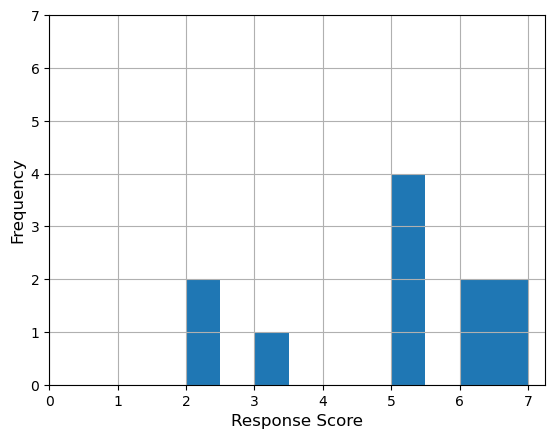

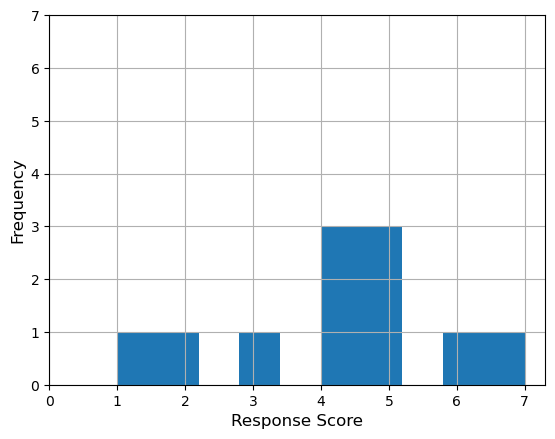

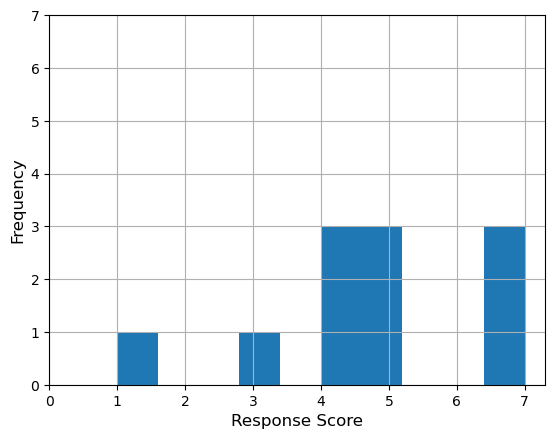

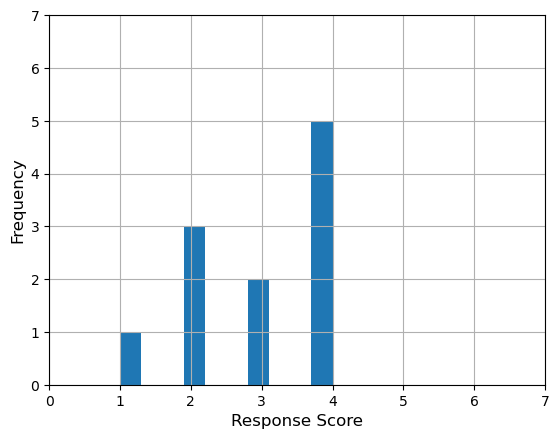

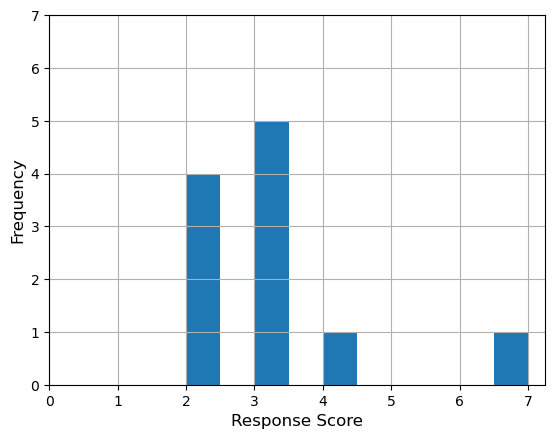

In [170]:
for responses in qalltab:
    responses.hist(align='mid')
    plt.xlabel('Response Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(range(0,8,1))
    plt.yticks(range(0,8,1))
    plt.show()

### Testing the assumption of normality (JavaScript)

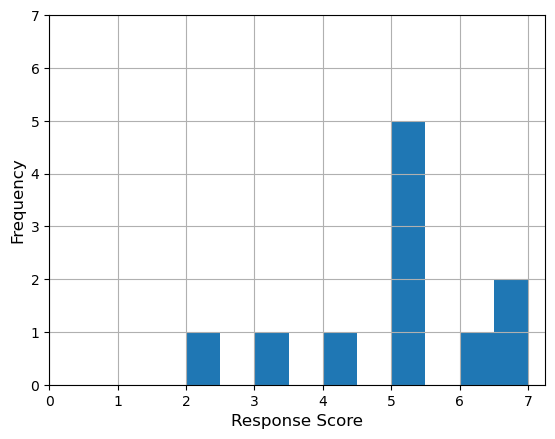

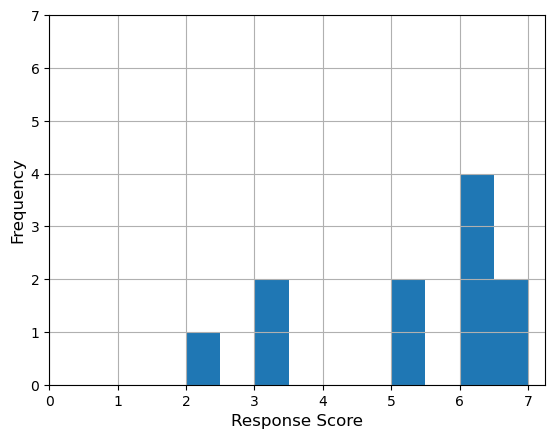

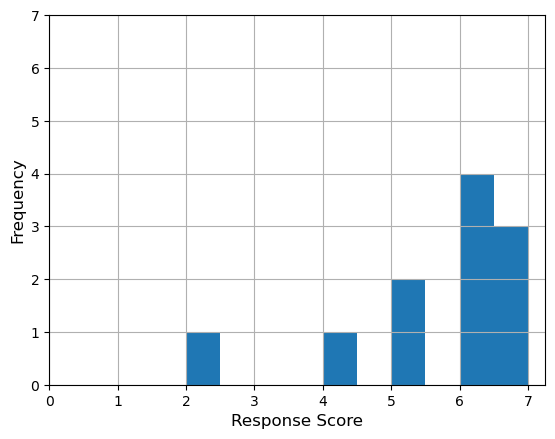

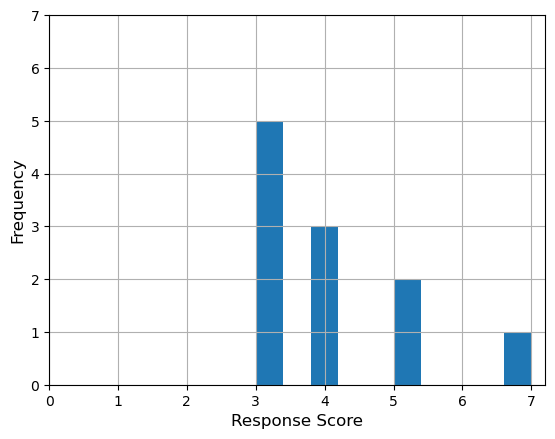

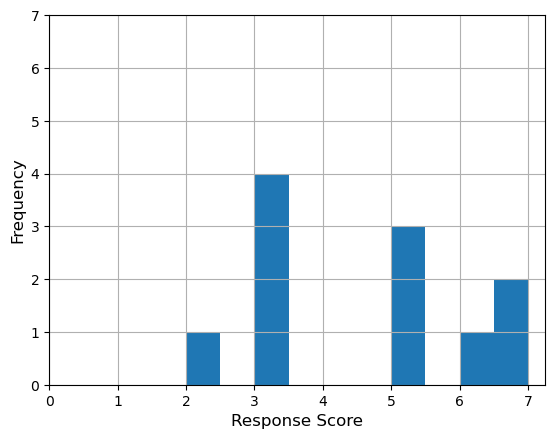

In [171]:
for responses in qalljavascript:
    responses.hist(align='mid')
    plt.xlabel('Response Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(range(0,8,1))
    plt.yticks(range(0,8,1))
    plt.show()

### T-Tests

In [151]:
# Performing two-sided T-Testing
tscores, pvalues = [], []
for question in range(0,len(qalltab),1):
    ttest = scipy.stats.ttest_rel(qalltab[question], qalljavascript[question], alternative='less')
    tscores.append(ttest[0])
    pvalues.append(ttest[1])

print(tscores)
print(pvalues)

[-0.12216944435630522, -1.392115115974261, -1.2179969144117253, -2.8030595529069404, -3.0120724833843706]
[0.45259254415377287, 0.09703492984472471, 0.12559135459090434, 0.009348080394218358, 0.00653562757662566]


(NOTE: The T-values/p-values and their implications relative to our project will be discussed in the Final Report.)

### Visualizing Central Tendency and Variance for each group

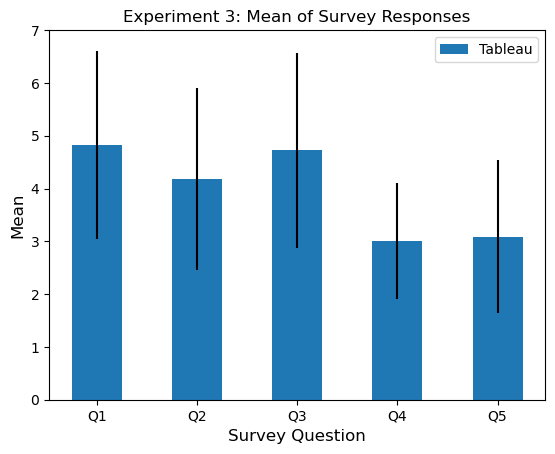

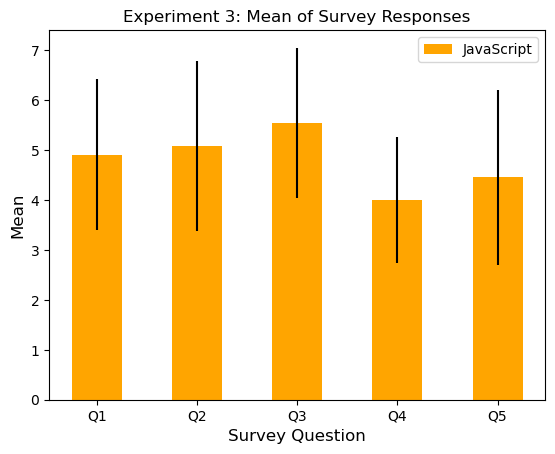

In [150]:
# Visualizing the TABLEAU results in a bar plot
qalltab_means = pd.Series({'Q1': q1tab.mean(), 'Q2': q2tab.mean(), 'Q3': q3tab.mean(), 'Q4': q4tab.mean(), 'Q5': q5tab.mean()})
qalltab_stds = pd.Series({'Q1': q1tab.std(), 'Q2': q2tab.std(), 'Q3': q3tab.std(), 'Q4': q4tab.std(), 'Q5': q5tab.std()})
plt.bar(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], qalltab_means, width=0.5, label='Tableau', yerr = qalltab_stds)
plt.xlabel('Survey Question', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.yticks(range(0,8,1))
plt.title('Experiment 3: Mean of Survey Responses')
plt.legend()
plt.show()

# Visualizing the JAVASCRIPT results in a bar plot
qalljavascript_means = pd.Series({'Q1': q1javascript.mean(), 'Q2': q2javascript.mean(), 'Q3': q3javascript.mean(), 'Q4': q4javascript.mean(), 'Q5': q5javascript.mean()})
qalljavascript_stds = pd.Series({'Q1': q1javascript.std(), 'Q2': q2javascript.std(), 'Q3': q3javascript.std(), 'Q4': q4javascript.std(), 'Q5': q5javascript.std()})
plt.bar(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], qalljavascript_means, width=0.5, color='orange', label='JavaScript', yerr = qalljavascript_stds)
plt.xlabel('Survey Question', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.yticks(range(0,8,1))
plt.title('Experiment 3: Mean of Survey Responses')
plt.legend()
plt.show()